In [1]:
# -*- coding: utf-8 -*-
import logging
from pathlib import Path

import pandas as pd
import numpy as np

import cloudpickle
import click

import numpy as np

import matplotlib.pyplot as plt

In [2]:
models = '../models'

In [3]:
model_file = Path(models) / 'logistic_model.pkl'
with open(model_file, 'rb') as fp:
    fitted_model = cloudpickle.load(fp)

In [4]:
grid_results = fitted_model.cv_results_

In [5]:
AUC = grid_results['mean_test_AUC']

In [6]:
alphas = np.ma.getdata(grid_results['param_clf__alpha'])

# rates = np.ma.getdata(grid_results['param_clf__optimizer__learning_rate'])
# dims = np.ma.getdata(grid_results['param_clf__hidden_layer_dim'])
# b_size = np.ma.getdata(grid_results['param_clf__batch_size'])
# opts = np.ma.getdata(grid_results['param_clf__optimizer'])

In [84]:
rates = np.array(rates, dtype=np.float)

NameError: name 'rates' is not defined

In [48]:
log_rates =np.log(rates)

In [49]:
dims.shape

(12,)

In [50]:
df = pd.DataFrame(np.stack((log_rates, dims, AUC), axis=-1))

In [51]:
df.columns = ['log_rates', 'dims', 'auc']

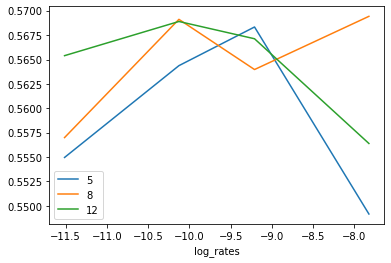

In [52]:
fig, ax2 = plt.subplots(1,1);
df.groupby('dims').plot('log_rates', 'auc', ax=ax2)
plt.legend([v[0] for v in df.groupby('dims')['dims']])

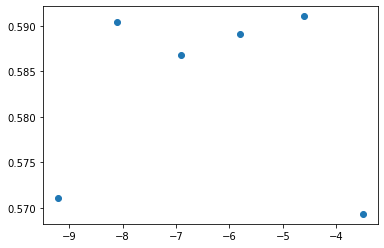

In [24]:
alphas = np.array(alphas, dtype=np.float)
log_alphas =np.log(alphas)
plt.scatter(log_alphas, AUC)

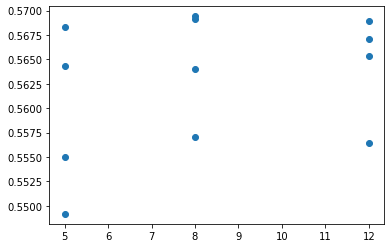

In [53]:
plt.scatter(dims, AUC)

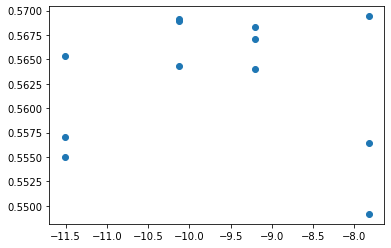

In [54]:
plt.scatter(log_rates, AUC)

In [55]:
plt.scatter(opts, AUC)

NameError: name 'opts' is not defined

In [56]:
print("Best: %f using %s" % (fitted_model.best_score_, 
    fitted_model.best_params_))

Best: 0.569425 using {'clf__hidden_layer_dim': 8, 'clf__optimizer__learning_rate': 0.0004}
